In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report


In [2]:
data = pd.read_csv('test.csv')

In [3]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [4]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [5]:
data.isna().sum()


tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [6]:
data = data.dropna()

In [7]:
data['Activity'].value_counts()

Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

In [8]:
data = data.drop_duplicates()

In [9]:
for column in data.select_dtypes(include=['float64']).columns:
    data[column] = data[column].astype('float32')


In [10]:
data['Activity'].value_counts()

Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

Building an optimized Random Forest model using GridSearchCV









In [ ]:
Y = data['Activity']

X = data.drop(columns=['Activity','subject'])

Y = pd.get_dummies(Y,drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25, stratify=Y, 
                                                    random_state=42)


cv_params = {
    'max_depth': [3, 4,5,6,7, None],
    'min_samples_leaf': [2, 3,4,5,6],
    'min_samples_split': [2, 3,4,5],
    'max_features': [2,3,4,5],
    'n_estimators': [50, 75, 100,125,150,175]
}

rf = RandomForestClassifier(random_state=0)
rf_cv = GridSearchCV(rf, cv_params, scoring='f1_macro', cv=3, refit='f1_macro', n_jobs=-1)
rf_cv.fit(X_train, y_train)


Hyperparameter 

In [15]:
best_params_df = pd.DataFrame(list(best_params.items()), columns=['Parameter', 'Best Value'])
best_params_df

,Parameter,Best Value
0,max_depth,NaN
1,max_features,5.0
2,min_samples_leaf,2.0
3,min_samples_split,2.0
4,n_estimators,150.0


Model Evaluation

In [20]:
y_pred = rf_cv.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})
metrics_df

,Metric,Value
0,Accuracy,0.937585
1,Precision,0.970671
2,Recall,0.923458
3,F1 Score,0.945679


Using cross-validation to determine model performance









In [12]:
x_Tr , X_val , Y_Tr , Y_val = train_test_split(X_train,y_train,test_size = 0.2,
                                              stratify = y_train, random_state = 10)

split_index = [0 if x in X_val.index else -1 for x in X_train.index ]

costom_split = PredefinedSplit(split_index)

rf = RandomForestClassifier(random_state=0)

rf_cv = GridSearchCV(rf, cv_params, scoring='f1_macro', cv=costom_split, refit='f1_macro', n_jobs=-1)
rf_cv.fit(X, Y)


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, None],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 75, 100, 125, 150, 175]},
             refit='f1_macro', scoring='f1_macro')

Hyperparameter

In [13]:
best_params_cross = rf_cv.best_params_
y_pred_cross = rf_cv.predict(X_test)

best_params_cross_df = pd.DataFrame(list(best_params_cross.items()), columns=['Parameter', 'Best Value'])

best_params_cross_df


,Parameter,Best Value
0,max_depth,NaN
1,max_features,5.0
2,min_samples_leaf,2.0
3,min_samples_split,2.0
4,n_estimators,100.0


In [14]:
accuracy_cross = accuracy_score(y_test, y_pred_cross)
precision_cross = precision_score(y_test, y_pred_cross, average='macro')
recall_cross = recall_score(y_test, y_pred_cross, average='macro')
f1_cross = f1_score(y_test, y_pred_cross, average='macro')

metrics_cross_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_cross, precision_cross, recall_cross, f1_cross]
})
metrics_cross_df

,Metric,Value
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1 Score,1.0


Extracting important features that contribute to model prediction









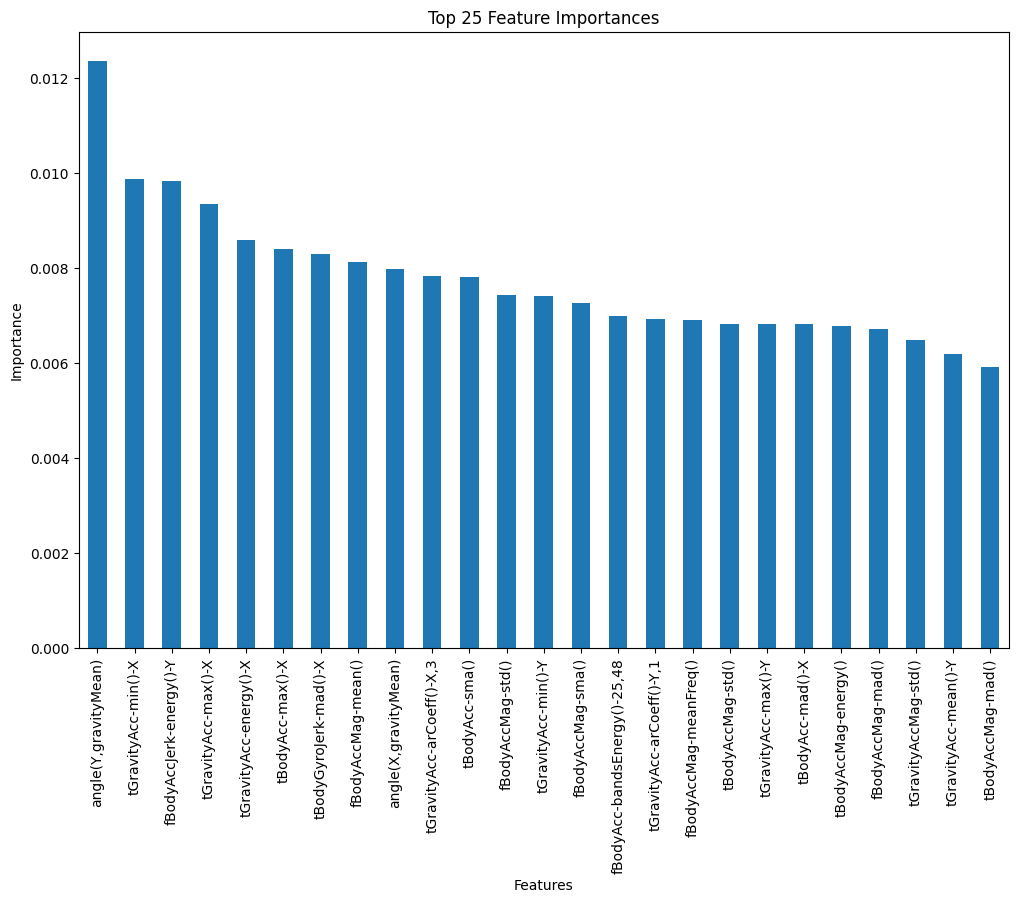

In [15]:
importances = rf_cv.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

forest_importances = forest_importances.iloc[0:25]

plt.figure(figsize=(12, 8))
forest_importances.plot(kind='bar', ax=plt.gca())
plt.xticks(rotation=90)
plt.title('Top 25 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()